In [1]:
import pandas as ps;
import numpy as np;

#Load the data 
data = ps.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Expection to the data 
data.duplicated()

#look for inconsistance in number of apperance ex: age = 714, cabin = 204
#look for inconsistance in the data types 
data.info()


#check for categorical columns( type == 'object' )
#and the numerical columns( type != 'object' ); no matter if int or floats
cat_col = [col for col in data.columns if data[col].dtype == 'object']
num_col = [col for col in data.columns if data[col].dtype != 'object']
print(f"numerical columns: {num_col}")
print(f"categorical columns: {cat_col}")


#check the total number of unique values in the categorical columns
uniq = data[cat_col].nunique()
print(f"No. of unique values of the categorical columns: {uniq}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
No. of unique values of the categorical columns: Name        891
Sex           2
Ticke

In [5]:
#We observed that the categorical columns can not be fitted into the programm
#do to not being understand by the computer 
#print the first 50 unique values of the 'ticket' field
data['Ticket'].unique()[:50]

#the (entries, fields) of the data before dropping the unwanted columns
data.shape

data_refactored = data.drop(columns=['Name', 'Ticket'])

data_refactored.shape
#Other operations for changing the categorical data into numerical data if the categorical is needed 
# in the program may be applied 


(891, 10)

In [12]:
#Handling the missing data
#find the percentage of the missing data column-wise
miss_data_per_col = round((data_refactored.isnull().sum() / data_refactored.shape[0]) * 100, 2)
#isnull() -> returns if the rows has null values for each category(returns a boolean)
print(miss_data_per_col)

#Ways to handle different scenarious
#for the 'Cabin' the missing percentage is 77.1% => we will drop the column
# for 'Embarked' is 0.22% => we will drop the null values keeping the column
data_refact2 = data_refactored.drop(columns='Cabin')
data_refact2.dropna(axis=0, inplace=True, subset=['Embarked'])
print(data_refact2.shape)

#When we want to add the functions(sometimes based also on our results with the model) we have 2 methods:
#1) mean imputation -> when data is normal distributed and has no extreme outliers
#2) median imputatino -> prefered when data is skewed or we have outliers
data_refact3 = data_refact2.fillna(data_refact2.Age.mean())
print("Filled the Age column with the mean~~")
print(data_refact3.shape)
print(round((data_refact3.isnull().sum() / data_refact3.shape[0]) * 100, 2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64
(889, 9)
Filled the Age column with the mean~~
(889, 9)
PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64


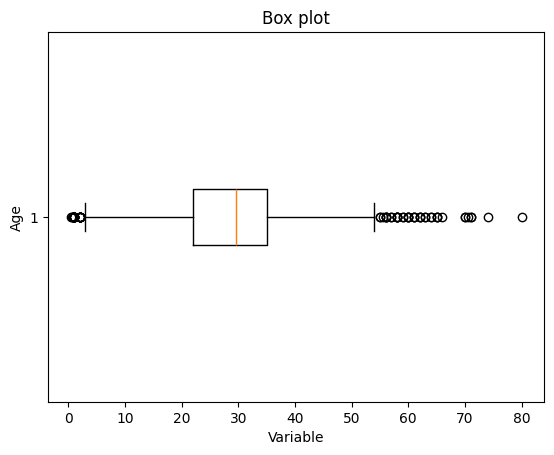

(821, 9)


In [16]:
#Handling outliers in the data Set
#techniques used -> clustering, interpolation or transformation can be used
#to observe the outliers we generally use a box plot where:
#1) the line inside the box denoutes the median 
#2) the box the interquartile range(IQR)
#3) denoute the non-extreme outliers within 1.5 the IQR
import matplotlib.pyplot as plt

plt.boxplot(data_refact3['Age'], vert=False)
plt.xlabel('Variable')
plt.ylabel('Age')
plt.title('Box plot')
plt.show()

#we have to get rid of the outliers
#compute the statistical measurements
mean = data_refact3['Age'].mean()
std_dev = data_refact3['Age'].std()
#compute the lower and upper bounds
lower_bound = mean - std_dev*2
upper_bound = mean + std_dev*2

#drop the rows that are outliers
data_refact4 = data_refact3[(data_refact3['Age'] >= lower_bound)&(data_refact3['Age'] <= upper_bound)]
print(data_refact4.shape)

In [25]:
#Data transformation used to change the data to fit better the case 
#methods: $ Normalisation $ Scaling $ Encoding 
pass

#Data validation and verification
#assuring data is consistent and correct comparing it with external expert sources
#For ML we separate the independent from target features 
# in this case: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] and the target ['Survived']

X = data_refact4[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = data_refact4['Survived']

print(X)
print(Y)

#Data formatting
#for Scaling we must maintain the shape of the old distribution
#methods for scaling 1) MIN-MAX method 2) Standardization(Z- scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

#get the numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X

#reshape the data
x1[num_col_] = scaler.fit_transform(x1[num_col_])
#print the comparison
print("\n\n~~~~comparison of the data\n\n")
x1.head()

#Z - standardization with Z = (X - mean) / std_dev
#better fit for the problems where a Gaussian distribution of the data is presented


     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.642093      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[821 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 821, dtype: int64


~~~~comparison of the data




C:\Users\pcojocar\AppData\Local\Temp\ipykernel_17016\3229085581.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S
